In [38]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [49]:
d = pd.read_csv('gpt4_gold_exps.csv')

In [50]:
d["pred_exps"] = d["pred_exps"].fillna("nopred")
d["gold_exps"] = d["gold_exps"].fillna("nogold")

def generate_rationales(predicted_text, top_n=5):
    # Tokenize the predicted text into words or tokens
    tokens = predicted_text.split()

    # Calculate importance scores for each token (e.g., using a model-specific method)
    # Here, we assume random scores as an example
    importance_scores = [1, 1, 1, 1, 1, 1, 1, 1]

    # Sort tokens by importance score in descending order
    sorted_tokens = [token for _, token in sorted(zip(importance_scores, tokens), reverse=True)]

    # Select the top N tokens as rationales
    selected_rationales = sorted_tokens[:top_n]

    # Join the selected rationales back into a text string
    rationale_text = " ".join(selected_rationales)

    return rationale_text

In [51]:
# This code calculates TF-IDF scores for the words in the input text and selects the top N words
# with the highest scores as rationales.
# Calculate the TF-IDF scores for each term in a document. High TF-IDF terms are considered important. 

def generate_rationales(predicted_text, top_n=5):
    # Create a TF-IDF vectorizer
    tfidf_vectorizer = TfidfVectorizer()
    
    # Fit the vectorizer on the text and transform the text into a TF-IDF matrix
    tfidf_matrix = tfidf_vectorizer.fit_transform([predicted_text])

    # Get the feature names (words) and their corresponding TF-IDF scores
    feature_names = tfidf_vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_matrix.toarray()[0]

    # Sort the feature names by their TF-IDF scores in descending order
    sorted_features = [feature for _, feature in sorted(zip(tfidf_scores, feature_names), reverse=True)]

    # Select the top N features as rationales
    selected_rationales = sorted_features[:top_n]

    # Join the selected rationales back into a text string
    rationale_text = " ".join(selected_rationales)

    return rationale_text

In [52]:
# Apply the generate_rationales function to the "predicted_text" column and create a new column "rationales"
d["pred_rationales"] = d["pred_exps"].apply(lambda x: generate_rationales(x, top_n=5))
d["gold_rationales"] = d["gold_exps"].apply(lambda x: generate_rationales(x, top_n=5))

In [53]:
def conditional_v_information(reference_tokens, model_tokens):
    # Convert tokens to sets for efficient set operations
    reference_set = set(reference_tokens)
    model_set = set(model_tokens)
    
    # Calculate the conditional V-information
    intersection = len(reference_set.intersection(model_set))
    v_information = -np.log2(intersection / len(reference_set))
    return v_information

In [54]:
d["rev"] = d.apply(lambda row: conditional_v_information(row["gold_rationales"], 
                           row["pred_rationales"]), axis=1)

In [55]:
def normalize_values(v_information):
    # Calculate the maximum and minimum values within v_information
    max_value = max(v_information)
    min_value = min(v_information)
    
    # Perform min-max scaling
    normalized_v_information = [(x - min_value) / (max_value - min_value) for x in v_information]
    
    return normalized_v_information

# Example usage:
reference_tokens = d['gold_rationales'].tolist()
model_tokens = d['pred_rationales'].tolist()
v_information = d['rev'].tolist()

normalized_v_information = normalize_values(v_information)

In [56]:
d['normalized_rev'] = normalized_v_information

In [57]:
d['normalized_rev'].mean()

0.23834380399223778

In [11]:
rev = d['rev'].tolist()
rev_n = d['normalized_rev'].tolist()

<Axes: ylabel='Count'>

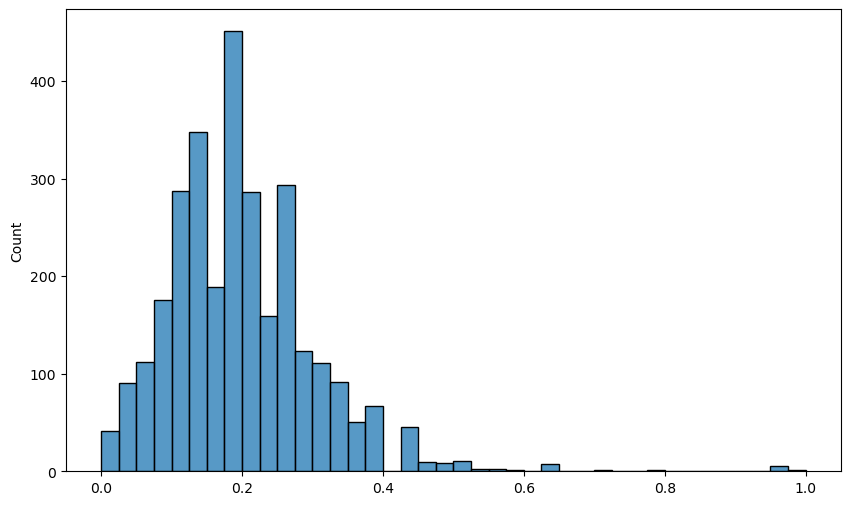

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt 


plt.figure(figsize=(10, 6))
sns.histplot(data=rev_n, bins=40)

In [58]:
d.groupby('functionality').mean('normalized_rev')

,Unnamed: 0,case_id,ref_case_id,ref_templ_id,templ_id,params_temperature,rev,normalized_rev
functionality,,,,,,,,
abuse targeted at individuals (not as member of a protected group,2873.0,3005.000000,NaN,82.738462,669.000000,0.5,0.603335,0.271480
abuse targeted at non protected groups (e.g. professions),2936.5,3069.209677,NaN,69.854839,733.209677,0.5,0.500352,0.225141
abuse targeted at objects,2808.0,2940.000000,NaN,87.615385,604.000000,0.5,0.539192,0.242618
dehumanisation (explicit),349.5,350.500000,NaN,NaN,50.500000,0.5,0.486060,0.218710
denouncements of hate that make direct reference to it,2705.0,2815.638298,476.600000,84.400000,561.787234,0.5,0.357129,0.160696
denouncements of hate that quote it,2548.0,2648.000000,652.127168,100.369942,542.549133,0.5,0.446609,0.200959
description using very negative attributes (explicit),209.5,210.500000,NaN,NaN,30.500000,0.5,0.636863,0.286567
direct threat,626.0,630.684211,NaN,NaN,90.526316,0.5,0.367056,0.165163
expression of strong negative emotions (explicit),69.5,70.500000,NaN,NaN,10.500000,0.5,0.445147,0.200301


In [ ]:
 # Normalize the value to the [0, 1] range
    max_value = -np.log2(1 / len(reference_set))  # Maximum value occurs when intersection = len(reference_set)
    min_value = 0  # Minimum value, which is 0
    
    # Perform min-max scaling
    normalized_v_information = (v_information - min_value) / (max_value - min_value)
    
    return normalized_v_information